In [1354]:
# Import packages/libraries here

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

### 1. Load Data

---

The data used for this project is available at the UCI website and can be downloaded here: `https://archive.ics.uci.edu/ml/datasets/Audit+Data#`   
The zip file contains 2 datasets in csv format:
- `trial.csv`
- `audit_risk.csv`  

The two files contain no information about the data other than the columns names. However, a paper was written and some more information can be discerned from there: 
*"Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.*  

For reference, a (free) version of the paper can be found here: `https://www.researchgate.net/publication/323655455_Fraudulent_Firm_Classification_A_Case_Study_of_an_External_Audit`

In [1355]:
# Load data
location = 'Data/trial.csv'
data = pd.read_csv(location)

### 2. Describe the Basic Format of your Data and the Columns

---

In [1356]:
data.head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


#### Explanation of the features of the data:
- Sector_score: Historical risk score value of the sector of the firm using analytical procedure.  
- Location_ID: Unique ID of the city/province
- Para_A: Discrepancy found in the planned expenditure of inspection and summary report A (in rupees)  
- Score_A: *This feature is not explained in the paper. It looks like it's some fraud score calculated analytically at the time the report A was made. As such, given that the target of this classifier should be to replace the need of an analytical calculation of the fraud score, this feature will be dropped*
- Para_B: Discrepancy found in the unplanned expenditure of inspection and summary report B (in rupees)  
- Score_B: *This feature is not explained in the paper. It looks like it's some fraud score calculated analytically at the time the report B was made. As such, given that the target of this classifier should be to replace the need of an analytical calculation of the fraud score, this feature will be dropped*
- Total: Total amount of discrepancy found in other reports (in rupees)
- Number: Historical discrepancy score
- Marks: *This feature is not explained nor used in the paper. It appears it may be related to some calculation for the fraud score or it may be the outcome of data analysis by the authors, so it will be dropped*
- Money_value: Amount of money involved in misstatements in the past audits
- District: Historical risk score of a district in the last 10 years  
- Loss: Amount of loss suffered by the firm last year  
- Loss_Score: *This feature is not explained in the paper. It looks like it's some score calculated analytically as outcome of previous audits or as outcome of data analysis by the authors. It will be dropped for this project*
- History: Average historical loss suffered by the firm in the last 10 years
- History_score: *This feature is not explained in the paper. It looks like it's some score calculated analytically as outcome of previous audits or as outcome of data analysis by the authors. It will be dropped for this project*
- Score: Total risk score using analytical procedure. The paper explains that the *Risk* attribute is calculated based on *Score* (1 if above a certain threshold, 0 if not). As such, given that we are just interested in evaluating the binary risk of a firm, this feature will be dropped.  
- Risk: Risk Class assigned to an audit case [this is the 'Target' feature]


Regarding the composition of the dataset, some generic info is reported here below:

In [1357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


From the list above, we can see that the attribute Money_Value has one 'null' instance. 
Also, LOCATION_ID is of type object and it will need to be converted if we need to use it for the classification. Let's see what's going on with this attribute.

In [1358]:
data['LOCATION_ID'][350:360]

350         8
351    LOHARU
352        31
353         4
354        14
355       NUH
356         5
357         5
358         5
359         5
Name: LOCATION_ID, dtype: object

Looking into LOCATION_ID, we can see that it is mainly constituted of integers (although represented as strings), with the exception of a few instances that are actually strings of characters. This will be taken care of in one of the next steps.

### 3. Drop unwanted columns

---

As explained earlier, some of the attributes contained in the dataset are of unknown origin (not explained in the paper) and/or it looks like they were added as the outcome of analytical calculations on the results of previous audits.  Given that the purpose of this model is to remove the need to rely on those analytical calculations, we decide to drop those columns.

In [1359]:
# Remove the unneccesary column:
unnecessary_features = ['Score', 'SCORE_A', 'SCORE_B', 'History', 'Marks', 
                        'MONEY_Marks', 'Loss', 'History']
data.drop(unnecessary_features, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 11 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
PARA_B           776 non-null float64
TOTAL            776 non-null float64
numbers          776 non-null float64
Money_Value      775 non-null float64
District         776 non-null int64
LOSS_SCORE       776 non-null int64
History_score    776 non-null int64
Risk             776 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 66.8+ KB


### 4. Convert your object based columns to numeric. 

---

Let's now take care of the LOCATION_ID attribute. Since the majority of values are integers, we can force conversion of strings to numeric values. 

In [1360]:
data.LOCATION_ID = pd.to_numeric(data.LOCATION_ID, errors='coerce', downcast='integer')
data['LOCATION_ID'][350:360]

350     8.0
351     NaN
352    31.0
353     4.0
354    14.0
355     NaN
356     5.0
357     5.0
358     5.0
359     5.0
Name: LOCATION_ID, dtype: float64

Now the strings of characters have been replaced by NaNs. Since we don't know which integer ID to assign to those literals, and there are other 700+ instances in the dataset (which should be enough to train and test our model), we can decide to drop those instances. 


### 5. Determine how many observations are missing

---
It's time to take care of those NaNs in the dataset. Let's first assess how many missing values are in this dataset.

In [1361]:
# How many columns have null values?
data.isnull().sum()

Sector_score     0
LOCATION_ID      3
PARA_A           0
PARA_B           0
TOTAL            0
numbers          0
Money_Value      1
District         0
LOSS_SCORE       0
History_score    0
Risk             0
dtype: int64

Since there are only 4 missing values but over 700 instances in this dataset, we can decide to drop them.

In [1362]:
data = data.loc[~data['LOCATION_ID'].isnull(), :]
data = data.loc[~data['Money_Value'].isnull(), :]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 775
Data columns (total 11 columns):
Sector_score     772 non-null float64
LOCATION_ID      772 non-null float64
PARA_A           772 non-null float64
PARA_B           772 non-null float64
TOTAL            772 non-null float64
numbers          772 non-null float64
Money_Value      772 non-null float64
District         772 non-null int64
LOSS_SCORE       772 non-null int64
History_score    772 non-null int64
Risk             772 non-null int64
dtypes: float64(7), int64(4)
memory usage: 72.4 KB


Let's confirm that the null values have been successfully removed:

In [1363]:
data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
PARA_B           0
TOTAL            0
numbers          0
Money_Value      0
District         0
LOSS_SCORE       0
History_score    0
Risk             0
dtype: int64

### (Optional) 6. Make the column names more descriptive

---
The column names of this dataset are already somewhat descriptive (provided that one reads the paper first, or the notes added to this notebook...), so no renaming is needed in this case.



### 7. Describe the summary statistics for the columns

---

In [1364]:
data.describe()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,TOTAL,numbers,Money_Value,District,LOSS_SCORE,History_score,Risk
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,20.209404,14.870466,2.460869,10.855947,13.284950,5.068005,14.191093,2.507772,2.062176,2.168394,0.629534
std,24.322215,9.889995,5.691631,50.207317,51.437422,0.265089,66.730436,1.231321,0.376025,0.681523,0.483243
min,1.850000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.207500,0.000000,0.555000,5.000000,0.000000,2.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.880000,0.415000,1.395000,5.000000,0.090000,2.000000,2.000000,2.000000,1.000000
75%,55.570000,19.000000,2.482500,4.170000,7.767500,5.000000,5.630000,2.000000,2.000000,2.000000,1.000000
max,59.850000,44.000000,85.000000,1264.630000,1268.910000,9.000000,935.030000,6.000000,6.000000,6.000000,1.000000


The `.describe()` function gives summary statistics for each of the attributes.  
What can be discerned at a first glance is that the attribute PARA_B has a very low mean (~10) and standard deviation but a very high max value (>1200). The same goes for TOTAL and, to a lesser extent, for Money_Value.
Another possible oddity is in the attribute Numbers. In this case the mean is very very close to the min value (5), but the max is 9.  
We can check these attributes in more detail in the next section.

### 8. Plot variables with potential outliers
---

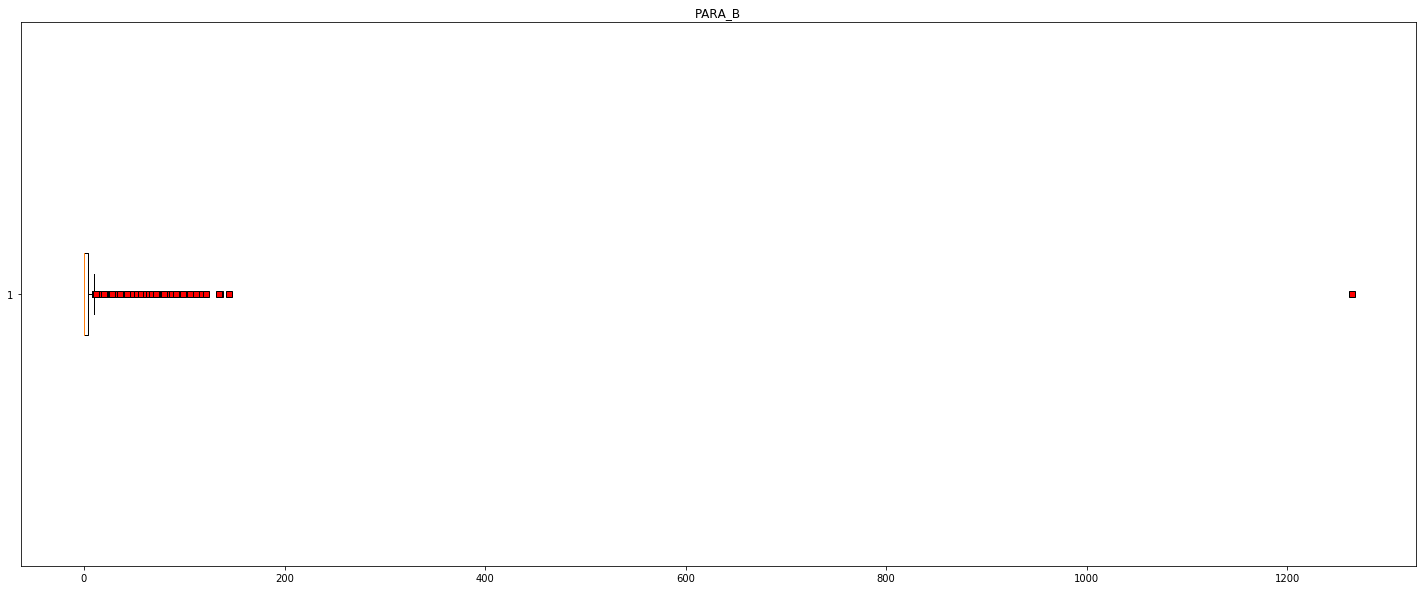

In [1365]:
feature = 'PARA_B'
plt.figure(figsize=(25,10))
plt.boxplot(data[feature], vert=False, 
            flierprops=dict(markerfacecolor='r', marker='s'))
plt.title(feature);

From the plot above we can easily see that the max value is very far off from any other value. This can be the result of a mistyped value, so we can decide to remove it.

In [1366]:
# Remove the row relative to the outliers
data = data[data['PARA_B']!=max(data['PARA_B'])]

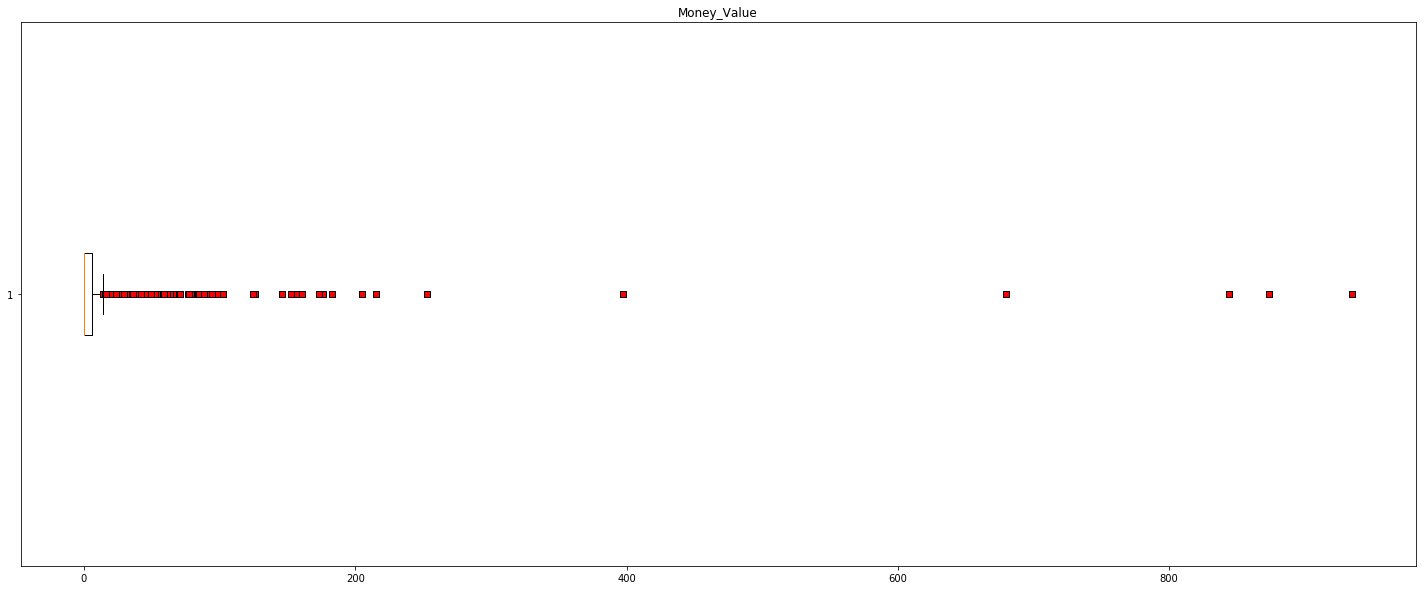

In [1367]:
feature = 'Money_Value'
plt.figure(figsize=(25,10))
plt.boxplot(data[feature], vert=False, 
            flierprops=dict(markerfacecolor='r', marker='s'))
plt.title(feature);

In the case of Money_Value the outliers are not as 'alone' and far off from the majority of the samples. At least not to the extent found in PARA_B. In this case we decide to keep those samples.

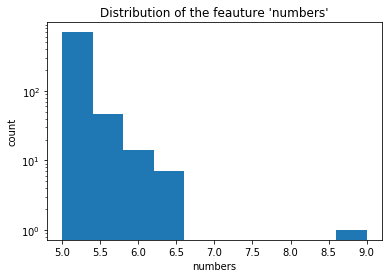

In [1368]:
feature = 'numbers'
plt.hist(data[feature], log=True)
plt.xlabel(feature)
plt.ylabel('count')
plt.title(f'Distribution of the feauture \'{feature}\'');


In the case of the feature 'numbers' it is a little odd that only one instance has value 9, while all the other 700+ are in the range [5, 6.5]. However, we decided to keep this instance.

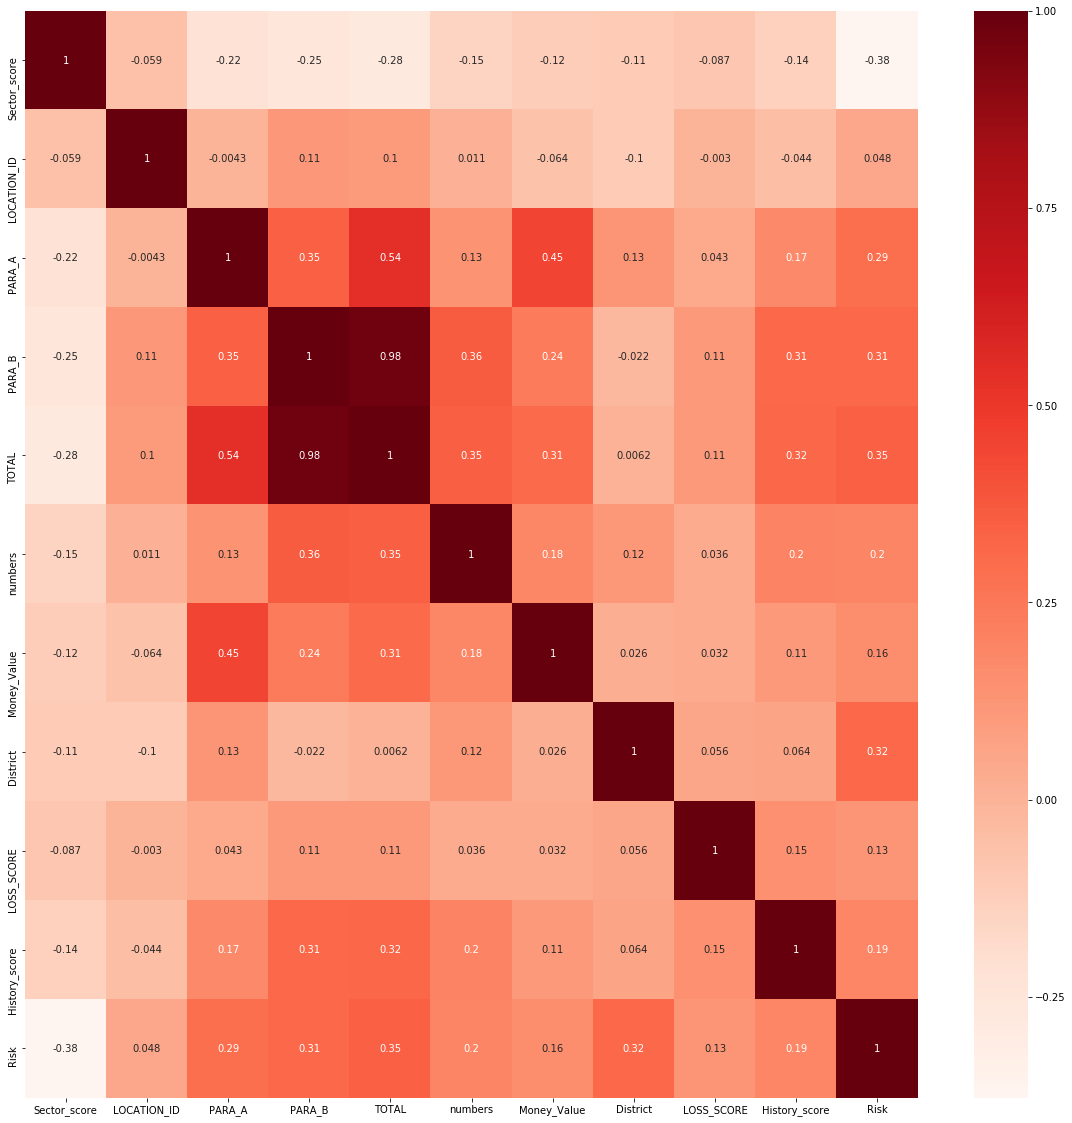

In [1369]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix shows a very high correlation between PARA_B and TOTAL. If we make a scatterplot of the two features one can see that there is a very linear relationship between the 2:

Text(0, 0.5, 'TOTAL')

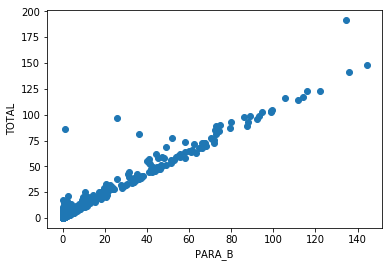

In [1370]:
plt.scatter(data['PARA_B'], data['TOTAL']);
plt.xlabel('PARA_B')
plt.ylabel('TOTAL')

On a second read of the attributes description, the TOTAL attribute is by definition the sum of other 2 attributes PARA_A and PARA_B

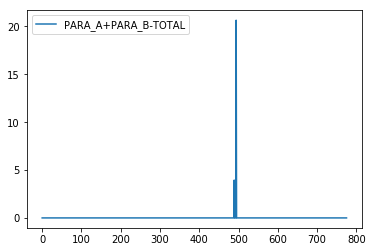

In [1371]:
TOTAL_err = data['PARA_A']+data['PARA_B']-data['TOTAL']
plt.plot(TOTAL_err, 
         label='PARA_A+PARA_B-TOTAL')
plt.legend();

The plot above shows that the difference between TOTAL and the sum of PARA_A and PARA_B is 0 except for a couple of datapoints. 

In [1372]:
suspicious_idx = TOTAL_err[TOTAL_err > 1e-10].index
data['PARA_A'][suspicious_idx]

489     3.95
494    20.65
Name: PARA_A, dtype: float64

In [1373]:
data['PARA_B'][suspicious_idx]

489    0.0
494    0.0
Name: PARA_B, dtype: float64

In [1374]:
data['TOTAL'][suspicious_idx]

489    0.0
494    0.0
Name: TOTAL, dtype: float64

It looks like the 2 samples of TOTAL above were miscalculated. This can be due to (e.g.) human error in the calculation or in the data entry. We decide to keep the 2 instances, but we will drop the feature TOTAL since it's clearly a linear combination of 2 other features of the dataset and it will not bring any additional information gain for the training of the model.

In [1375]:
data.drop('TOTAL', axis=1, inplace=True)

In [1376]:
cor = data.corr()
#Correlation with output variable
cor_target = abs(cor["Risk"])
#Selecting correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending=False)


Risk             1.000000
Sector_score     0.378039
District         0.315499
PARA_B           0.314819
PARA_A           0.291169
numbers          0.195713
History_score    0.188040
Money_Value      0.159654
LOSS_SCORE       0.127142
Name: Risk, dtype: float64

### 12. Machine Learning
---

Let's start by preparing the data into input and output arrays.

In [1377]:
# Create X and y
#feature_cols = ['LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score']
target = 'Risk'
feature_cols = data.columns.drop(target)
feature_cols

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers',
       'Money_Value', 'District', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [1378]:
X = data.loc[:, feature_cols]
y = data['Risk']

Then let's split the data set into train and test subsets.

In [1379]:
# Split data into training and testing sets (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 55)

Before starting with the training of the model, let's compute the null accuracy of the dataset (i.e. the accuracy we would obtain by always selecting the majority class)

In [1381]:
# compare against the null accuracy
value_counts = y_test.value_counts()
value_counts

1    122
0     71
Name: Risk, dtype: int64

In [1382]:
null_accuracy = max(value_counts)/sum(value_counts)
null_accuracy

0.6321243523316062

The bare minimum score of our model must then be 63%! Let's see if we can do (much) better than that...  
  
As a starting point, we can try to fit all the data to a decision tree of depth 5.


In [1383]:
# Fit a classification tree
clf = DecisionTreeClassifier(max_depth = 5)
# Train the model
clf.fit(X_train, y_train);

In [1384]:
# class predictions
predictions = clf.predict(X_test)

In [1385]:
# calculate classification accuracy
score = clf.score(X_test, y_test)
score

0.9637305699481865

The score obtained without any tweaking is already quite high. If we plot the confusion matrix of this model (below) we see that just 5 instances are classified as frauds when they should not, and 2 are classified as non fraudulent when they are instead suspicious. Let's see if we can improve the model.

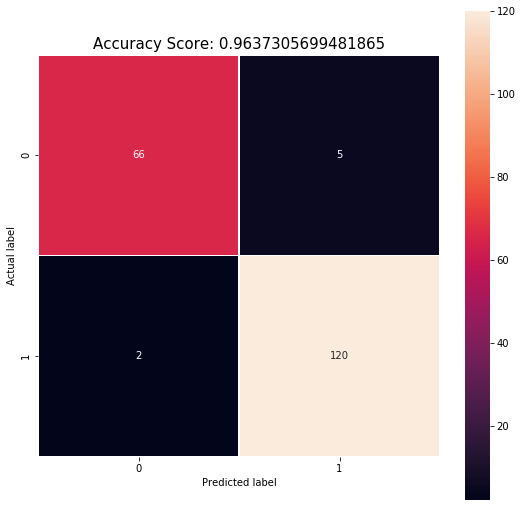

In [1386]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

In [1387]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [1388]:
# calculate the sensitivity
print(TP / (TP + FN))

0.9836065573770492


In [1389]:
# calculate the specificity
print(TN / (TN + FP))

0.9295774647887324


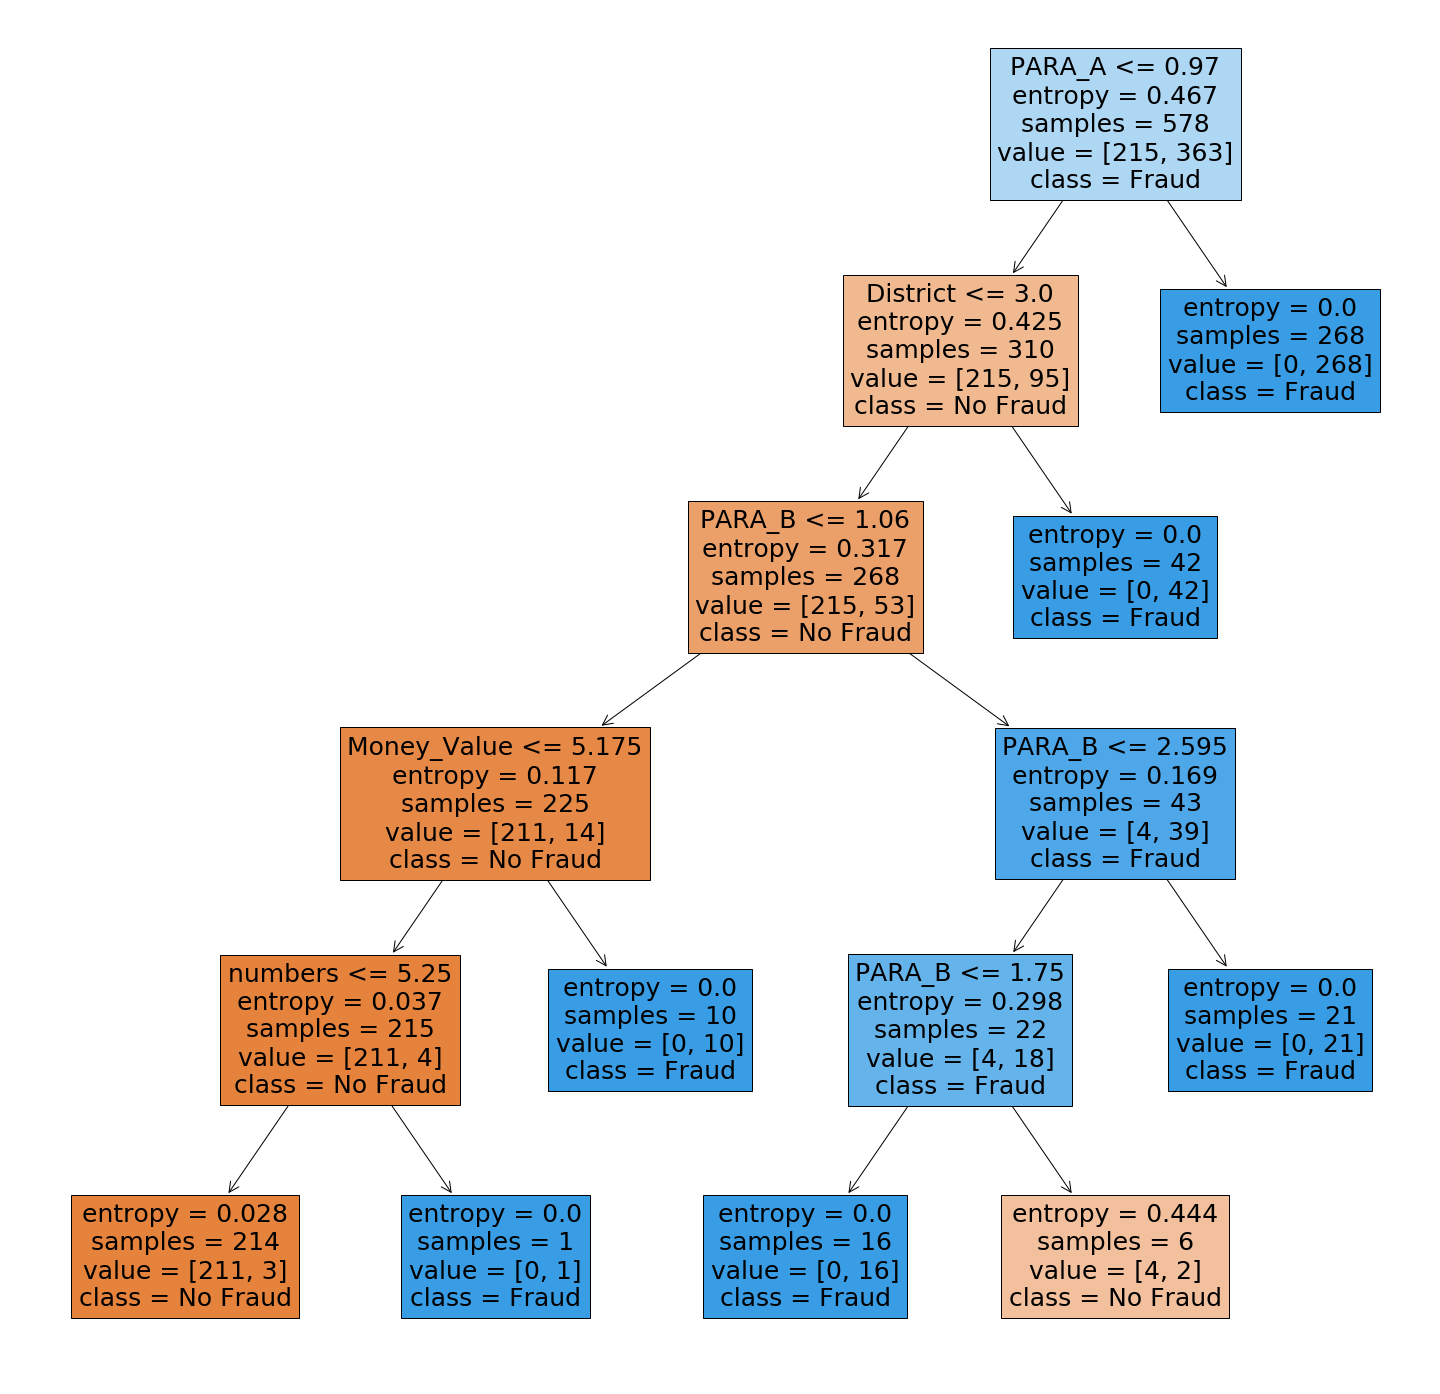

In [1390]:
#NOTE: this command requires scikit-learn v0.21 installed
plt.figure(figsize=(25,25))
tree_plot = tree.plot_tree(clf.fit(X_train, y_train), feature_names=feature_cols,
                     class_names=['No Fraud', 'Fraud'], filled=True)

Let's now see if we can reduce the number of features and account only for the most important ones. This step is key since it reduces the complexity of the model, thus making it easier to explain.

In [1391]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
PARA_A,0.529
PARA_B,0.215
District,0.179
Money_Value,0.070
numbers,0.007
Sector_score,0.000
LOCATION_ID,0.000
LOSS_SCORE,0.000
History_score,0.000


In [1392]:
min_importance = 0.02
not_important = importances[importances.values<min_importance].index
not_important



Index(['numbers', 'Sector_score', 'LOCATION_ID', 'LOSS_SCORE',
       'History_score'],
      dtype='object', name='feature')

In [1393]:
X.drop(not_important, axis=1, inplace=True)

In [1394]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 775
Data columns (total 4 columns):
PARA_A         771 non-null float64
PARA_B         771 non-null float64
Money_Value    771 non-null float64
District       771 non-null int64
dtypes: float64(3), int64(1)
memory usage: 50.1 KB


The number of features used as inputs to the model is now down to just 4.

In [1395]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 100)

In [1396]:
# Fit a classification tree
clf = DecisionTreeClassifier(max_depth = 5)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1397]:
# class predictions
predictions = clf.predict(X_test)

In [1398]:
# calculate classification accuracy
score = clf.score(X_test, y_test)
score

0.9689119170984456

After removing those not important features, the accuracy was not affected (it actually increased slightly).

We can now play with the depth of the tree to see if we can further improve the model.

In [1399]:
min_depth = 1
max_depth = 50
scores = []
for n in range (min_depth, max_depth):
    # Fit a classification tree
    clf = DecisionTreeClassifier(max_depth = n)
    # Train the model
    clf.fit(X_train, y_train)
    # class predictions (not predicted probabilities)
    predictions = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))
best_depth = scores.index(max(scores)) + min_depth

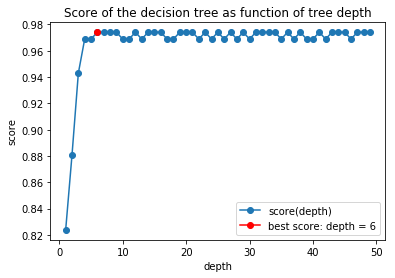

In [1400]:
plt.plot(range(min_depth, max_depth), scores, label='score(depth)', marker='o')
plt.title('Score of the decision tree as function of tree depth')
plt.xlabel('depth')
plt.ylabel('score')
plt.plot(best_depth, max(scores), 
         label=f'best score: depth = {best_depth}',
         marker='o', color = 'r') 
plt.legend();

In [1401]:
max(scores)

0.9740932642487047

It looks like a tree depth of 6 is optimal, with an accuracy score of 97.4%  The resulting decision tree is pictured below:

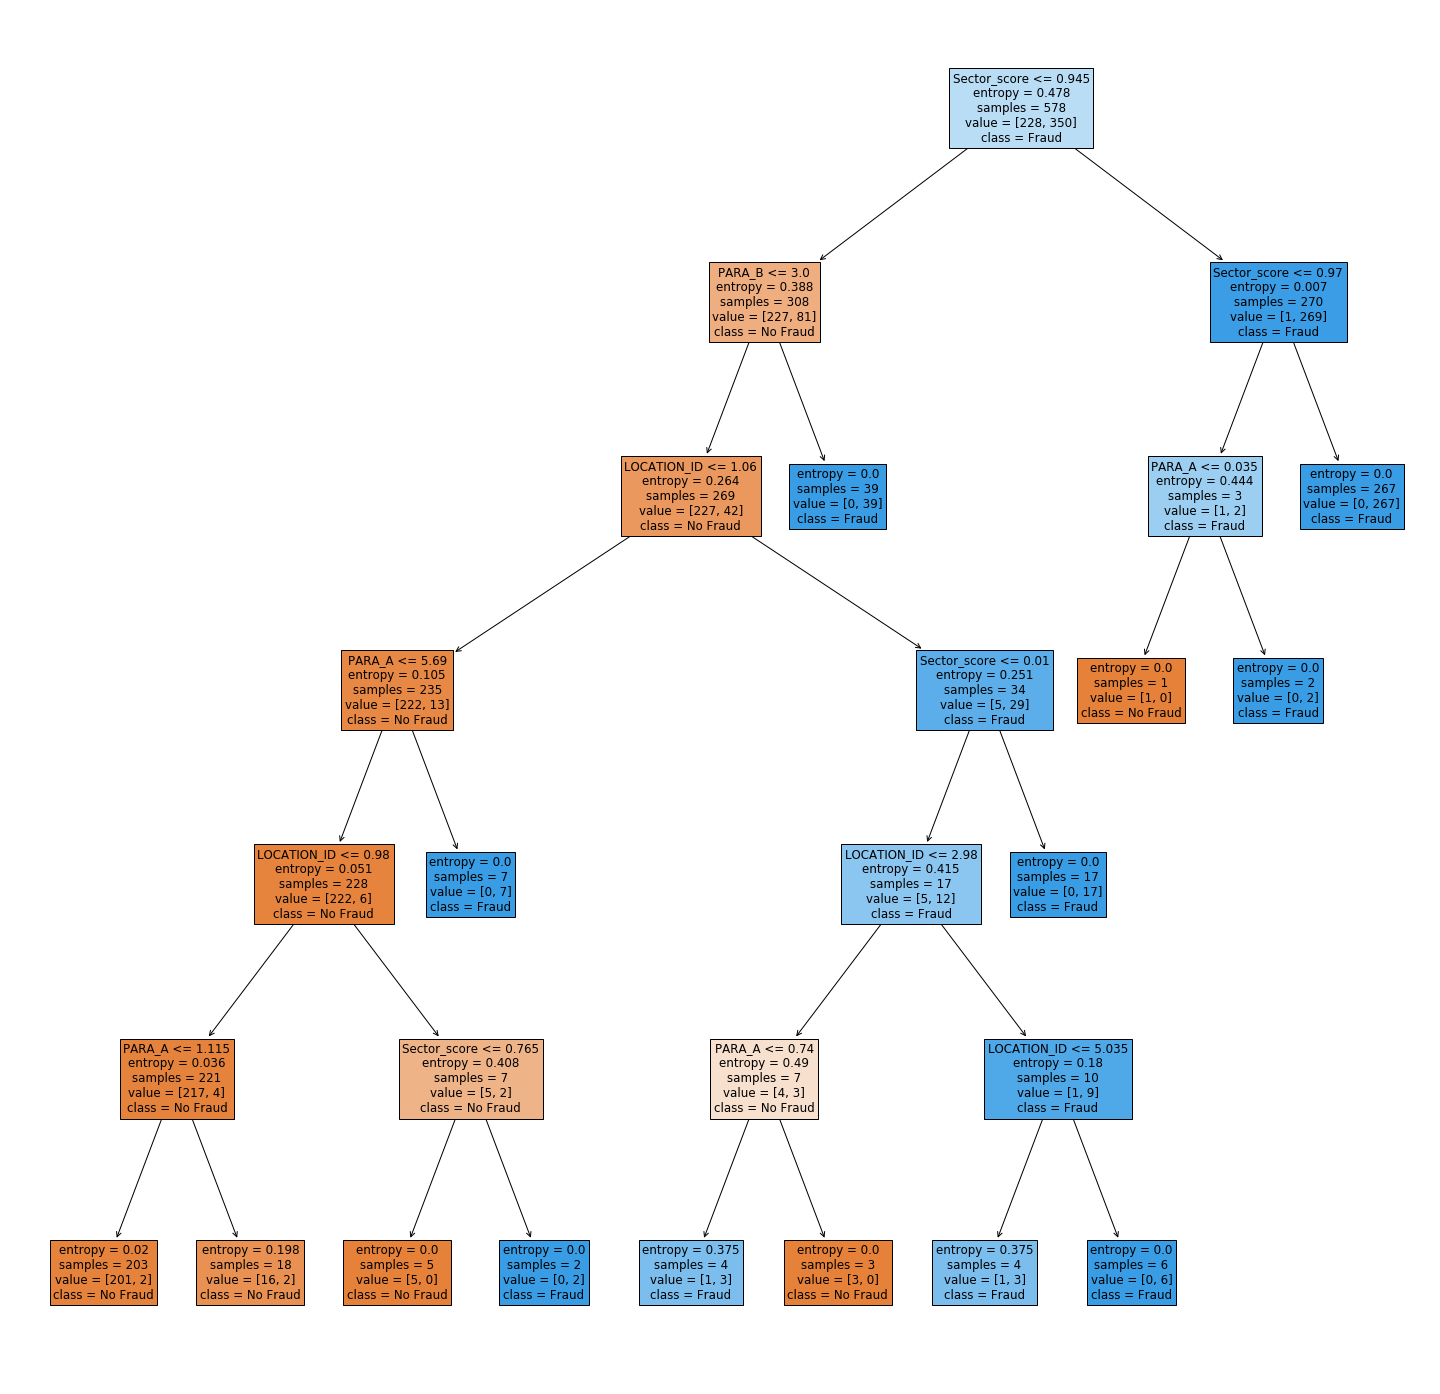

In [1402]:
clf = DecisionTreeClassifier(max_depth = best_depth)
plt.figure(figsize=(25,25))
tree_plot = tree.plot_tree(clf.fit(X_train, y_train), feature_names=feature_cols,
                     class_names=['No Fraud', 'Fraud'], filled=True)

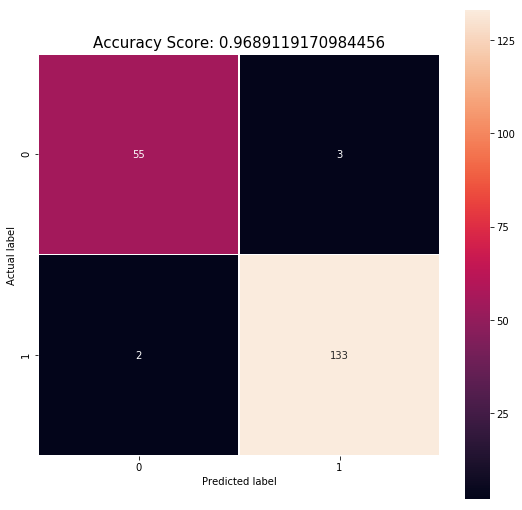

In [1403]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

In [1404]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [1405]:
# calculate the sensitivity
print(TP / (TP + FN))

0.9851851851851852


In [1406]:
# calculate the specificity
print(TN / (TN + FP))

0.9482758620689655


In this case we have just 2 instances of frauds not detected, and 3 instance of non-frauds classified as frauds. The sensitivity is 98.5%, while the specificity is at almost 95%.

### Conclusions
---

The final decistion tree model obtained is able to classify if a firm is fraudulent or not with an accuracy of 97% by looking at just 4 of the features of the dataset.  
The optimal tree depth is 6. Whether this makes the tree too complicated or not probably depends on the application of this model. If the model will be used to explain how a firm is classified as fraudulent or not, a tree this big may not be the best choice (there are many decision points). In this case it may be worthy to reduce the depth to e.g. 4. This will reduce the number of decision points and will make the model easier to explain, while only marginally reducing the accuracy.  
If instead the model will be used as a 'blackbox' in an automated process, then a depth of 6 does not add much computational effort. One should note however increasing the depth of the tree may increase the risk of overfitting to the available data.